## Uploading CSV File

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# Load the CSV file
df = pd.read_csv('heart_2022_uncleaned.csv')

In [2]:
df.shape # Dimension of the input.

(445132, 40)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [4]:
df.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     24
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

## Removing Duplicates

In [5]:
df.duplicated().sum()

157

In [6]:
df.drop_duplicates(inplace= True)

## Finding Out the percentage of missing values 

In [7]:
mask = df.isnull().any(axis = 1)

num_of_rows_with_nan = mask.sum()
num_of_data_rows = len(df)

percentage_of_nan = num_of_rows_with_nan / num_of_data_rows
print(f'percentage of nan values = {percentage_of_nan*100:.2f}%')

percentage of nan values = 44.71%


##### The percentage is too large so we cannot remove the missing values.

## Finding out the percentage of missing values in each column.

In [8]:
df.isnull().sum() / len(df)

State                        0.000000
Sex                          0.000000
GeneralHealth                0.002681
PhysicalHealthDays           0.024545
MentalHealthDays             0.020365
LastCheckupTime              0.018655
PhysicalActivities           0.002445
SleepHours                   0.012243
RemovedTeeth                 0.025518
HadHeartAttack               0.006877
HadAngina                    0.009888
HadStroke                    0.003488
HadAsthma                    0.003973
HadSkinCancer                0.007052
HadCOPD                      0.004976
HadDepressiveDisorder        0.006308
HadKidneyDisease             0.004317
HadArthritis                 0.005906
HadDiabetes                  0.002432
DeafOrHardOfHearing          0.046074
BlindOrVisionDifficulty      0.048135
DifficultyConcentrating      0.054149
DifficultyWalking            0.053637
DifficultyDressingBathing    0.053419
DifficultyErrands            0.057331
SmokerStatus                 0.079366
ECigaretteUs

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Automatically select all object (categorical) columns
columns_to_encode = df.select_dtypes(include=['object']).columns

# Convert mixed-type columns to string, then apply label encoding
for col in columns_to_encode:
    df[col] = df[col].astype(str)  # Convert all values to strings
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays           10922
MentalHealthDays              9062
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                    5448
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [11]:
# We will fill the null values with mean.
columns_to_fill = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

for col in columns_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)

In [12]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [13]:
df.dropna(thresh=len(df.columns) - 2, inplace=True)


In [14]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].applymap(lambda x: pd.NA if x < 0 else x)


In [15]:
df


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,0.0,0.0,3,0,8.0,4,0,...,1.70269,83.074632,28.529907,0,0,1,0,2,0,0
1,0,0,0,0.0,0.0,4,0,6.0,4,0,...,1.60000,68.040000,26.570000,0,0,0,0,0,0,0
2,0,0,4,2.0,3.0,3,1,5.0,4,0,...,1.57000,63.500000,25.610000,0,0,0,0,4,0,2
3,0,0,0,0.0,0.0,3,1,7.0,4,0,...,1.65000,63.500000,23.300000,0,0,1,1,0,0,0
4,0,0,1,2.0,0.0,3,1,9.0,4,0,...,1.57000,53.980000,21.770000,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,48,0,2,0.0,3.0,1,1,6.0,3,0,...,1.65000,69.850000,25.630000,2,1,0,0,0,0,2
445128,48,0,0,2.0,2.0,3,1,7.0,3,0,...,1.70000,83.010000,28.660000,0,1,1,0,2,0,0
445129,48,0,3,30.0,30.0,0,0,5.0,0,0,...,1.70000,49.900000,17.230000,2,0,0,0,0,0,0
445130,48,1,4,0.0,0.0,3,0,5.0,3,1,...,1.83000,108.860000,32.550000,0,1,1,1,0,0,2


In [16]:
df.to_csv('heart_2022_cleaned.csv', index=False)

In [17]:
from sklearn import metrics, model_selection, preprocessing

In [18]:
# Checking the columns in df
print(df.columns)

# Separating features and target variable
x = df.drop(columns=['HadHeartAttack'])  # Drop the target column
y = df['HadHeartAttack']                # Access the target column

# Printing shapes of x and y
print(x.shape, y.shape)


Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
(444975, 39) (444975,)


((444975, 39), (444975, 39), (444975,))

In [20]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size=0.1, random_state=42, stratify=y
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((400477, 39), (44498, 39), (400477,), (44498,))

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

# Create the Decision Tree model
dt = DecisionTreeClassifier(max_depth=10)

# Perform k-fold cross-validation (e.g., k=5)
k = 5  # Number of folds
cross_val_scores = cross_val_score(dt, x_train, y_train, cv=k, scoring='accuracy')

# Calculate the mean and standard deviation of accuracy across folds
mean_accuracy = np.mean(cross_val_scores)
std_accuracy = np.std(cross_val_scores)

print(f'Cross-Validation Accuracy: Mean = {mean_accuracy*100:.2f}%, Std = {std_accuracy*100:.2f}%')

# Train the model on the full training set
dt.fit(x_train, y_train)

# Test the model on the test set
y_pred1 = dt.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred1)
print(f'Test Accuracy = {acc*100:.2f}%')

Cross-Validation Accuracy: Mean = 93.92%, Std = 0.04%
Test Accuracy = 93.91%


Cross-Validation Accuracy: Mean = 93.79%, Std = 0.06%
Test Accuracy = 93.80%


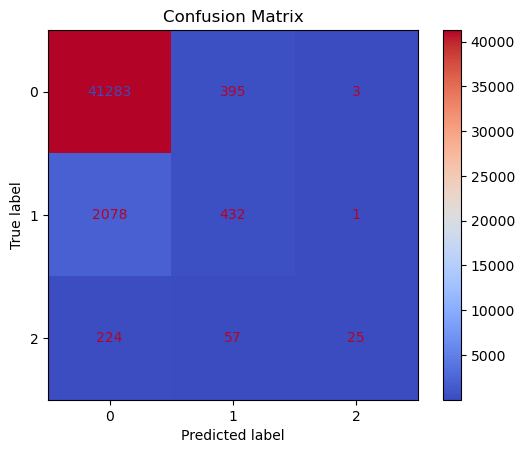

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Create the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Perform k-fold cross-validation (e.g., k=5)
k = 5  # Number of folds
cross_val_scores = cross_val_score(lr, x_train, y_train, cv=k, scoring='accuracy')

# Calculate the mean and standard deviation of accuracy across folds
mean_accuracy = np.mean(cross_val_scores)
std_accuracy = np.std(cross_val_scores)

print(f'Cross-Validation Accuracy: Mean = {mean_accuracy*100:.2f}%, Std = {std_accuracy*100:.2f}%')

# Train the model on the full training set
lr.fit(x_train, y_train)

# Test the model on the test set
y_pred1 = lr.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred1)
print(f'Test Accuracy = {acc*100:.2f}%')

# Visualize the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.coolwarm)
plt.title('Confusion Matrix')
plt.show()
